<font size =6>
Отбор данных одномерной выборки

Выполнил: Шутов Захар (ММБ-003)

# **Введение**


Подключаем библиотеки

In [ ]:
from sympy import *
init_printing()
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

Берём данные из файла

In [ ]:
ds0 = pd.read_csv("ML.ds1.csv", delimiter = ",")

In [ ]:
ds = ds0[['v19']].rename({'v19': 's19'}, axis = 1)
ds

,s19
0,0.576769
1,1.205356
2,1.372145
3,0.982709
4,2.700911
...,...
495,1.923757
496,1.891610
497,1.013456
498,0.893310


## **Нахождение описательной статистики выборки**

Вычислим числовые характеристики выборки, которые будем использовать в дальнейшем

In [ ]:
mu = ds.s19.mean()
sd = ds.s19.std()
med = ds.s19.median()
sk = ds.s19.skew()

Создадим таблицу с перечисленными выше характеристиками

In [ ]:
ind = ['mean', 'sd', 'med', 'sk']
dat = [mu, sd, med, sk]
pd.DataFrame(dat, ind, columns = ['Sample']).T

,mean,sd,med,sk
Sample,1.126104,0.589525,1.010144,2.058856


### Комментарий

*mean* - выборочное среднее, то есть оценка математического ожидания от генеральной совокупности, представленной имеющейся выборкой

*std* - стандартное отклонение, то есть оценка среднего квардратического отклонения генеральной совокупности, представленной имеющейся выборкой

*med* - выборочная медиана, то есть оценка медианы генеральной совокупности, представленной имеющейся выборкой

*skew* - выборочный коэффицент асимметрии, то есть оценка коэффицента асимметрии генеральной совокупности, представленной имеющейся выборкой

# **Визуализация данных**

1.Построим цветную
диаграмму рассеяния выборки (scatterplot), расположив выборочные значения по
горизонтальной оси 

Text(0.5, 0, 'Выборочные значения')

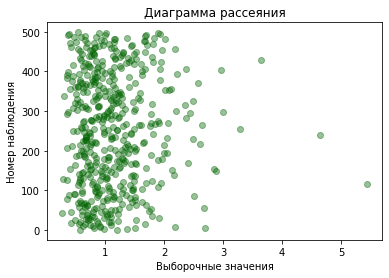

In [ ]:
plt.scatter(ds.s19, ds.index, c = 'darkgreen', alpha = 0.4)
plt.title("Диаграмма рассеяния")
plt.ylabel("Номер наблюдения")
plt.xlabel("Выборочные значения")

В выборке присутствуют аномальные данные

Возможно, в генеральной совокупности присутствует несимметричность

Пологая часть графика плотности полностью находится свправа

2.Построим цветную
диаграмму размаха (boxplot)

Text(0.5, 0, 'Выборочные значения')

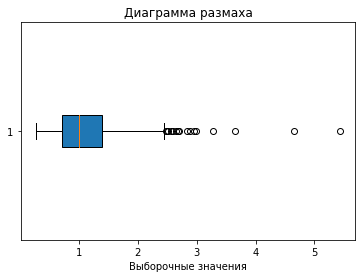

In [ ]:
plt.boxplot(ds.s19, None, None, false, patch_artist = true)
plt.title('Диаграмма размаха')
plt.xlabel('Выборочные значения')

В выборке присутствуют аномальные данные

Возможно, в генеральной совокупности присутствует несимметричность

Пологая часть графика плотности полностью находится свправа

3.Построим цветную гистограмму
относительных частот

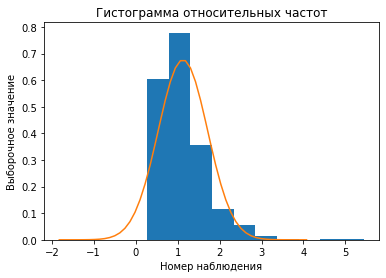

In [ ]:
plt.hist(ds.s19, density = True)
plt.title("Гистограмма относительных частот")
plt.xlabel("Номер наблюдения")
plt.ylabel("Выборочное значение")
x = np.linspace(mu-5*sd, mu+5*sd)
plt.plot(x, stats.norm.pdf(x, mu, sd))

Возможно, в генеральной совокупности присутствует несимметричность

Пологая часть графика плотности полностью находится свправа

## Вывод

В выборке присутствуют аномальные данные. Возможно, в генеральной совокупности присутствует несимметричность со сдвигом вправо. Пологая часть графика плотности полностью находится свправа

# **Отбор данных**

## **Проверка на симметричность**

Проведем первый тест, основанный на сравнении выборочного среднего с выборочной медианой, для этого вычислим наблюдаемое и критическое значения 

Наблюдаемое значение

In [ ]:
xn = abs(mu - med)
xn

0.11596051406281016

Критическое значение

In [ ]:
xk = (3*sd)/(math.sqrt(500))
xk

0.07909308067898843

Наблюдаемое значение получилось больше критического, следовательно гипотеза о симметричности генеральной совокупности отвергается

Проведем второй тест, основанный на оценке величины выборочного коэффициента асимметричности, для этого вычислим наблюдаемое и критическое значения 

Наблюдаемое значение

In [ ]:
xn = abs(sk)
xn

2.058855719767505

Критическое значение

In [ ]:
xk = 3*math.sqrt((6*(500 - 1))/((500 + 1)*(500 + 3)))
xk

0.3269973982840565

Наблюдаемое значение получилось больше критического, следовательно гипотеза о симметричности генеральной совокупности отвергается

### Вывод

Генеральная совокупность несимметрична на основании анализа диаграмм и результатов тестов

## **Чистка данных**

Из-за того, что гипотеза о симметричности генеральной совокупности отвергается, практически все элементы выборки из этой совокупности будем считать содержащимися в интервале $ \left(\overline x - 5s ;\overline x + 5s \right) $, где $ \overline x $ - выборочное среднее, s - стандартное отклонение. Вычислим границы этого интервала

A - нижняя граница интервала 

B - верхняя граница интервала

In [ ]:
A = mu-5*sd
B = mu+5*sd
A, B

(-1.8215206769774126, 4.073729487959033)

Отсеим аномальные значения

In [ ]:
ds1 = ds.query('s19 > @A')
ds1 = ds1.query('s19 < @B')
ds1

,s19
0,0.576769
1,1.205356
2,1.372145
3,0.982709
4,2.700911
...,...
495,1.923757
496,1.891610
497,1.013456
498,0.893310


Вычислим сколько элементов из выборки попали в интервал

In [ ]:
ds1.shape[0]

498

Определим, какие элементы из выборки оказались за границами интервала

In [ ]:
ds[ds.s19<=A]

,s19


In [ ]:
ds[ds.s19>=B]

,s19
116,5.435762
239,4.647532


### Вывод

Отбор данных по интервалу позволил отсечь два аномальных значения, сократив выборку до 498 элементов. Строки 116 и 239 находятся за верхней границей интервала

# **Заключение**

Был проведет отбор данных одномерной выборки. Использовались библиотеки Python pandas, matplotlib, numpy, stats. Была найдена описательная статистика выборки, данные визуализированы на трёх диаграммах, проведены тесты для проверки гипотезы о симметричности, отобраны аномальные данные. По итогам работы гипотеза о симметричности генеральной совокупности отвергнута, аномальные данные найдены на интервале $ \left(mu - 5sd ;mu + 5sd \right) $, где mu - выборочное среднее, sd - стандартное отклонение. Обнаружены 2 аномальных значения: элементы выборки с номерами 116, 239 не попавшие в указанный интервал. Эти значения были удалены из выборки.